http://brianfarris.me/static/digit_recognizer.html  
https://www.kaggle.com/c/digit-recognizer

In [37]:
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from nolearn.dbn import DBN #needs python 2.7? also needs _useGpu = 'no' ??
#dbn module in nolearn is not compatible with Python 3.
import timeit
import time
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt    

print ("packages loaded")

packages loaded


In [2]:
train = pd.read_csv("./data/train.csv")
print ("type(train) = ", type(train))

type(train) =  <class 'pandas.core.frame.DataFrame'>


In [3]:
print (train.shape)#returns tuple (#rows, #columns)
print (len(train.index))#num rows.
print (train.head(5))
#NB: dataframe columns are label, pixel0, pixel1....pixel783. 
#print (train.describe)
#NB 785 columns = 1 result column for digits 0-9, 784 columns = 28 x 28 pixel matrix


(42000, 785)
42000
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0

In [4]:
print (train.ix[:,1:785].shape)
#NB train.ix[:,1:785].max() returns max of each column. ie: 784 values
print (train.ix[:,1:785].max().max())
print (train.ix[:,1:785].min().min())

(42000, 784)
255
0


type(pixels) as loaded from train.ix[1,1:785] <class 'pandas.core.series.Series'> , shape =  (784,)
len(pixels.nonzero()) =  245
after np.array:  <class 'numpy.ndarray'> (784,)
after pixels.reshape :  <class 'numpy.ndarray'> (28, 28)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0  14 232 254 254 254  29   0   0   0   0   0   0   0   0
   0  75 254 254 254  17   0   0   0   0]


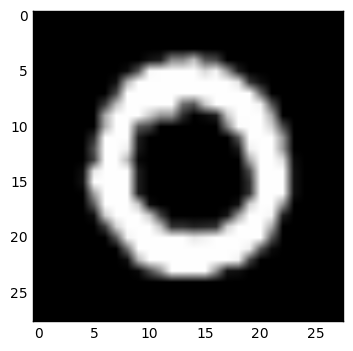

In [56]:
#print first image to see what it looks like
pixels = train.ix[1,1:785]
#print (pixels)
print ("type(pixels) as loaded from train.ix[1,1:785]", type(pixels), ", shape = ", pixels.shape)
print ("len(pixels.nonzero()) = ", len(pixels.nonzero()[0]))
#print ("pixels.value_counts() = \n", pixels.value_counts())
#NB pandas.value_counts() Excludes NA values by default.
pixels = np.array(pixels, dtype='uint8')
print ("after np.array: ", type(pixels), pixels.shape)
pixels = pixels.reshape((28, 28))
print ("after pixels.reshape : ", type(pixels), pixels.shape)
print (pixels[0][0:28])
print (pixels[14][0:28])
#imgplot = plt.imshow(myimage)
plt.imshow(pixels, cmap='gray')

In [45]:
print (train.label.unique())
print (train.pixel0.unique())
print (train.pixel1.unique())
print (train.pixel2.unique())
print (train.pixel3.unique())
print (train.pixel4.unique())
print (train.pixel5.unique())
print (train.pixel6.unique())
print (train.pixel7.unique())
print (train.pixel8.unique())

[1 0 4 7 3 5 8 9 2 6]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [6]:
start_time = time.time()
features = train.columns[1:]
print ("type(features) = ", type(features))
print ("features = ", features)#column names. NB: not a list object.
print ("features.shape = ", features.shape)
#training columns = all columns except first column (column zero0 which contains the digit represented)
X = train[features]
y = train['label']
print ("type(X) = ", type(X))
print ("type(y) = ", type(y))
print ("train.shape = ", train.shape)
print ("X.shape = ", X.shape)#one less column than dataframe train
print ("y.shape = ", y.shape)#single column = Series
print("--- %s seconds ---" % (time.time() - start_time))
#run time < 1 second

type(features) =  <class 'pandas.indexes.base.Index'>
features =  Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)
features.shape =  (784,)
type(X) =  <class 'pandas.core.frame.DataFrame'>
type(y) =  <class 'pandas.core.series.Series'>
train.shape =  (42000, 785)
X.shape =  (42000, 784)
y.shape =  (42000,)
--- 0.16614985466003418 seconds ---


In [7]:
print (train.dtypes.index)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [8]:
start_time = time.time()
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X/255.,y,test_size=0.1,random_state=0)
print("--- %s seconds ---" % (time.time() - start_time))

#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#random_state : int or RandomState Pseudo-random number generator state used for random sampling.
#ensures repeatability.

#test_size : float, int, or None (default is None) 
#If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
#If int, represents the absolute number of test samples

#NB: X/255. divides all values of X by 255.0 = result will be float.
#~1 second run time

--- 0.9068171977996826 seconds ---


In [9]:
print ("type(X_train) = ", type(X_train))
print ("X_train.shape = ", X_train.shape)

print ("\ntype(y_train) = ", type(y_train))
print ("y_train.shape = ", y_train.shape)

print ("\ntype(X_test) = ", type(X_test))
print ("X_test.shape = ", X_test.shape)

print ("\ntype(y_test) = ", type(y_test))
print ("y_test.shape = ", y_test.shape)

type(X_train) =  <class 'pandas.core.frame.DataFrame'>
X_train.shape =  (37800, 784)

type(y_train) =  <class 'pandas.core.series.Series'>
y_train.shape =  (37800,)

type(X_test) =  <class 'pandas.core.frame.DataFrame'>
X_test.shape =  (4200, 784)

type(y_test) =  <class 'pandas.core.series.Series'>
y_test.shape =  (4200,)


In [10]:
print ((X/255.).max().max())
print ((X/255.).min().min())
print (X.max().max())
print (X.min().min())


1.0
0.0
255
0


In [11]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

start_time = time.time()
clf_rf = RandomForestClassifier()
print ("type(clf_rf)= ", type(clf_rf))
clf_rf.fit(X_train, y_train)
print ("model fitted")
y_pred_rf = clf_rf.predict(X_test)
print ("predictions created.")
acc_rf = accuracy_score(y_test, y_pred_rf)
print ("random forest accuracy: ",acc_rf)
print("--- %s seconds ---" % (time.time() - start_time))
#~ 4.5 seconds run time

type(clf_rf)=  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
model fitted
predictions created.
random forest accuracy:  0.940476190476
--- 3.9675793647766113 seconds ---


In [12]:
print (type(clf_rf))

<class 'sklearn.ensemble.forest.RandomForestClassifier'>


In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

start_time = time.time()
clf_sgd = SGDClassifier()
print ("type(clf_sgd)= ", type(clf_sgd))

clf_sgd.fit(X_train, y_train)
print ("model fitted")

y_pred_sgd = clf_sgd.predict(X_test)
print ("predictions created.")

acc_sgd = accuracy_score(y_test, y_pred_sgd)
print ("stochastic gradient descent accuracy: ",acc_sgd)
print("--- %s seconds ---" % (time.time() - start_time))
#~ 4 seconds run time

In [ ]:
start_time = time.time()

print ("start")
clf_svm = LinearSVC()
print ("type(clf_svm)= ", type(clf_svm))

clf_svm.fit(X_train, y_train)
print ("model fitted")

y_pred_svm = clf_svm.predict(X_test)
print ("type(y_pred_svm)= ", type(y_pred_svm))

acc_svm = accuracy_score(y_test, y_pred_svm)
print ("Linear SVM accuracy: ",acc_svm)
print("--- %s seconds ---" % (time.time() - start_time))
#~120 seconds run time.

In [ ]:
start_time = time.time()

print ("start")
clf_knn = KNeighborsClassifier()
print ("type(clf_knn)= ", type(clf_knn))

clf_knn.fit(X_train, y_train)
print("fitting completed.")

y_pred_knn = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ("nearest neighbors accuracy: ",acc_knn)

print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
#this cell will not run on python 3.x environments, DBN module requires python 2.7
#start_time = time.time()

#print ("start")
#clf_nn = DBN([X_train.shape[1], 300, 10],learn_rates=0.3,learn_rate_decays=0.9,epochs=15)

#print ("type(clf_knn)= ", type(clf_knn))
#clf_nn.fit(X_train, y_train)
#print("fitting completed.")
#print("--- total elapsed time = %s seconds ---" % (time.time() - start_time))
#acc_nn = clf_nn.score(X_test,y_test)
#print ("neural network accuracy: ",acc_nn)
#print("--- %s seconds ---" % (time.time() - start_time))

In [13]:
from skimage.color import rgb2grey
from scipy.misc import imresize
from scipy.misc import imread
print ("image libraries imported")

image libraries imported


In [14]:
import matplotlib.image as mpimg
import numpy as np
myimage = mpimg.imread('./images/IMG_8006.jpg')
print (type(myimage))
print (myimage.shape)#NB: images from iphone 4s are 1936x1936x3 : the x3 are rgb values.

<class 'numpy.ndarray'>
(1936, 1936, 3)


In [15]:
#print (myimage)

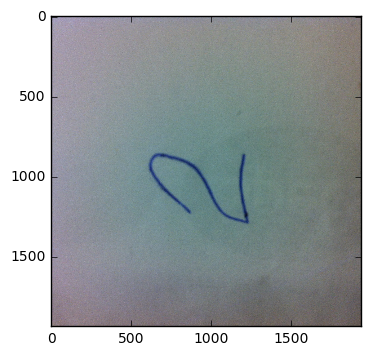

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt    
imgplot = plt.imshow(myimage)

In [17]:
from skimage.color import rgb2gray
mygrayImage = rgb2gray(myimage)


In [18]:
print ("type(mygrayImage) = ", type(mygrayImage))
print (mygrayImage.shape)
print (mygrayImage)

type(mygrayImage) =  <class 'numpy.ndarray'>
(1936, 1936)
[[ 0.66168     0.66560157  0.6375851  ...,  0.48874471  0.4893102
   0.50696863]
 [ 0.65775843  0.66895765  0.66895765 ...,  0.49266627  0.4893102
   0.51873333]
 [ 0.65327137  0.64150667  0.64542824 ...,  0.49658784  0.46913686
   0.50696863]
 ..., 
 [ 0.54446431  0.54446431  0.55791059 ...,  0.35846196  0.34026078
   0.35594706]
 [ 0.54616863  0.52263922  0.51255608 ...,  0.35259098  0.34082627
   0.39180667]
 [ 0.54392863  0.54114588  0.5136949  ...,  0.35651255  0.36435569
   0.35765137]]


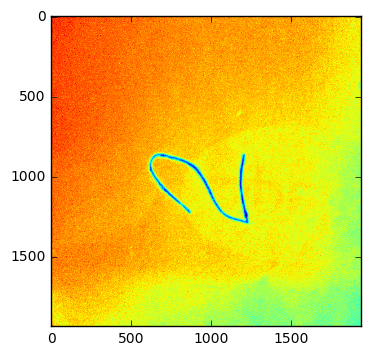

In [19]:
imgplot = plt.imshow(mygrayImage)
#this is weird. grey image has more colours than original when plotted.

In [ ]:
#
#mygrayImage.thumbnail((64, 64), Image.ANTIALIAS) # resizes image in-place
#imgplot = plt.imshow(mygrayImage)

In [ ]:
pil_im = Image.open('./images/IMG_8006.jpg')
print (type(pil_im))
gplot = plt.imshow(pil_im)

In [ ]:
pil_im_l = pil_im.convert('L')
print (type(pil_im_l))
gplot = plt.imshow(pil_im_l)

In [ ]:
pil_im_l28 = pil_im_l.resize((28,28))
print ("type(pil_im_l28) = ", type(pil_im_l28))
gplot = plt.imshow(pil_im_l28)

In [ ]:
imarray = np.array(pil_im_l28)
print (type(imarray))
print ("imarray.shape = ", imarray.shape)
print ("pil_im_l28.size = ", pil_im_l28.size)

In [ ]:
print (imarray.max())
print (imarray.min())
#flatten array into vector
imarray_flat = imarray.reshape((1, 784))
print (imarray_flat.shape)

In [ ]:
print (type(np.array(features)), np.array(features).shape)
print (type(imarray_flat), imarray_flat.shape)

In [ ]:
pil_im_l28_df = pd.DataFrame(imarray_flat, index=[1])
print (type(pil_im_l28_df), pil_im_l28_df.shape)
print (pil_im_l28_df)

In [ ]:
print (pil_im_l28_df.dtypes.index)
print (type(list(pil_im_l28_df.dtypes.index)))
print (type(list(features)))

In [ ]:
new_colnames = dict(zip(pil_im_l28_df, features))
print (type(new_colnames))

In [ ]:
pil_im_l28_df.rename(index=str, columns=new_colnames)

In [ ]:
my_predict = clf_rf.predict(pil_im_l28_df)

In [ ]:
print (my_predict[0])
#image of '2' predicted as 0.

In [30]:
def readPict(file_name, fitted_classifier, features):
    #file_name = [string] representing filename of image
    #fitted_classifier [sklearn classified object supporting .predict]
    #features [pandas.indexes.base.Index] contains names of columns used to create the classifier.
    %matplotlib inline
    #pil_im = Image.open(file_name).rotate(-90)
    pil_im = Image.open(file_name)
    print ("image as loaded, shape = ", np.array(pil_im).shape, "\n", np.array(pil_im))
    #gplot = plt.imshow(pil_im)
    print (type(pil_im))
    #pil_im_l = pil_im.convert('LA')
    pil_im_l = pil_im.convert('LA')
    print ("after convert('LA'), shape = ", np.array(pil_im_l).shape, "\n", np.array(pil_im_l))
    #gplot = plt.imshow(pil_im_l)
    print (type(pil_im_l))
    pil_im_l28 = pil_im_l.resize((28,28))
    print ("after resize((28,28)), shape = ", np.array(pil_im_l28).shape, "\n", np.array(pil_im_l28))
    gplot2 = plt.imshow(pil_im_l28)
    print ("type(pil_im_l28) = ", type(pil_im_l28))
    imarray = np.array(pil_im_l28)
    print ("imarray.shape = ", imarray.shape)
    imarray_flat = imarray.reshape((1, 784))
    #fails ^here^
    pil_im_l28_df = pd.DataFrame(imarray_flat, index=[1])
    new_colnames = dict(zip(pil_im_l28_df, features))
    pil_im_l28_df.rename(index=str, columns=new_colnames)
    print ("max = ", pil_im_l28_df.max().max())
    print ("min = ", pil_im_l28_df.min().min())
    my_predict = fitted_classifier.predict(pil_im_l28_df)
    return my_predict[0]
print ("function readPict loaded")

function readPict loaded


image as loaded, shape =  (568, 553, 3) 
 [[[118 147 151]
  [110 139 143]
  [114 144 146]
  ..., 
  [115 148 153]
  [108 141 146]
  [115 149 151]]

 [[118 147 151]
  [118 147 151]
  [111 141 143]
  ..., 
  [121 154 159]
  [113 146 151]
  [113 147 149]]

 [[118 147 151]
  [122 151 155]
  [112 142 144]
  ..., 
  [119 153 155]
  [113 147 149]
  [111 145 147]]

 ..., 
 [[121 143 140]
  [123 145 142]
  [125 148 142]
  ..., 
  [121 146 140]
  [122 147 141]
  [122 148 139]]

 [[124 146 143]
  [124 146 143]
  [126 148 145]
  ..., 
  [118 143 137]
  [121 146 140]
  [125 151 142]]

 [[126 148 145]
  [123 145 142]
  [123 145 142]
  ..., 
  [120 146 137]
  [127 153 144]
  [127 153 144]]]
<class 'PIL.PngImagePlugin.PngImageFile'>
after convert('LA'), shape =  (568, 553, 2) 
 [[[138 255]
  [130 255]
  [135 255]
  ..., 
  [138 255]
  [131 255]
  [139 255]]

 [[138 255]
  [138 255]
  [132 255]
  ..., 
  [144 255]
  [136 255]
  [137 255]]

 [[138 255]
  [142 255]
  [133 255]
  ..., 
  [143 255]
  [137 

ValueError: total size of new array must be unchanged

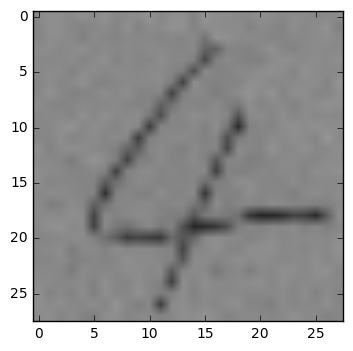

In [31]:
print (readPict("./images/digit_four.png", clf_rf, features))

In [ ]:
print (readPict("./images/IMG_8007.JPG", clf_rf, features))

In [ ]:
print (readPict("./images/IMG_8008.JPG", clf_rf, features))

In [ ]:
print (readPict("./images/IMG_8009.JPG", clf_rf, features))

In [ ]:
print (readPict("./images/IMG_8025.JPG", clf_rf, features))